In [3]:
import pandas as pd 
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img =cv2.imread("./testImages/000001.jpg")
img.shape

(1600, 1233, 3)

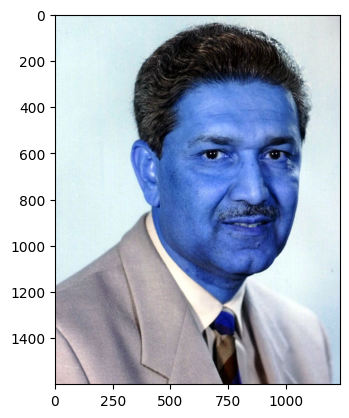

In [7]:
plt.imshow(img)

In [8]:
#remove the third dimemnsion    from the omage and convert it into gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1600, 1233)

In [9]:
gray

array([[249, 249, 249, ..., 207, 202, 202],
       [248, 248, 248, ..., 205, 201, 201],
       [245, 246, 247, ..., 203, 200, 201],
       ...,
       [200, 203, 206, ..., 208, 202, 201],
       [203, 206, 208, ..., 209, 206, 204],
       [206, 209, 210, ..., 212, 209, 208]],
      shape=(1600, 1233), dtype=uint8)

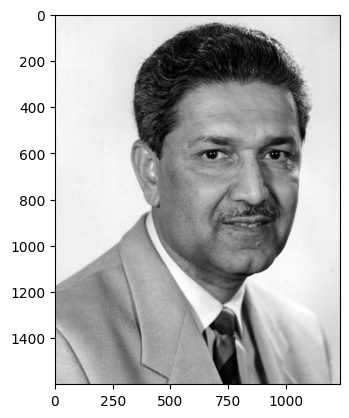

In [11]:
plt.imshow(gray,cmap='gray')

In [12]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[502, 335, 693, 693]], dtype=int32)

In [13]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(502), np.int32(335), np.int32(693), np.int32(693))

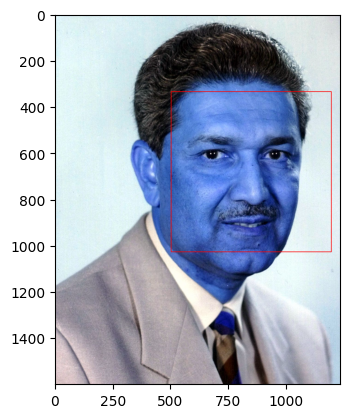

In [14]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

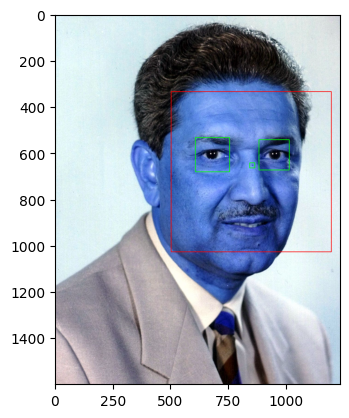

In [15]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

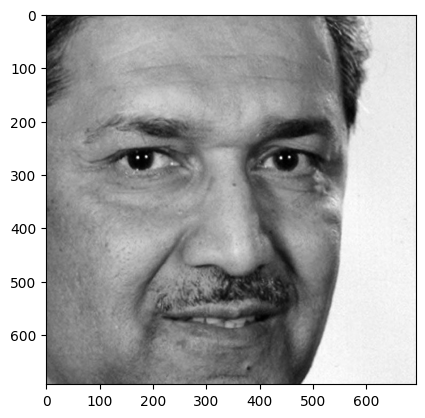

In [17]:
plt.imshow(roi_gray,cmap='gray')

In [18]:
cropped_img = np.array(roi_color)
cropped_img.shape

(693, 693, 3)

In [19]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

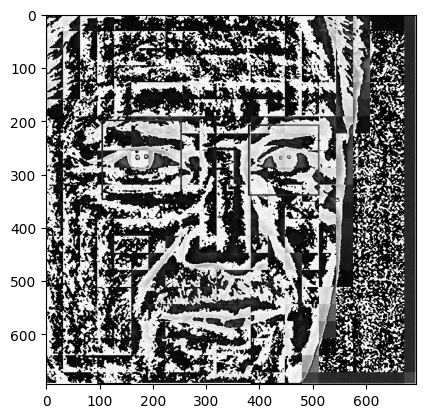

In [20]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [21]:
# # (3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
# python function that can take input image and returns cropped image (if face and eyes >=2 are detected)
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

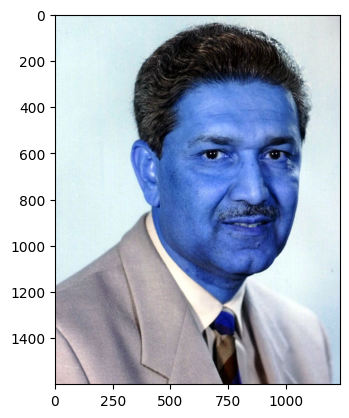

In [24]:
original_image = cv2.imread('./testImages/000001.jpg')
plt.imshow(original_image)

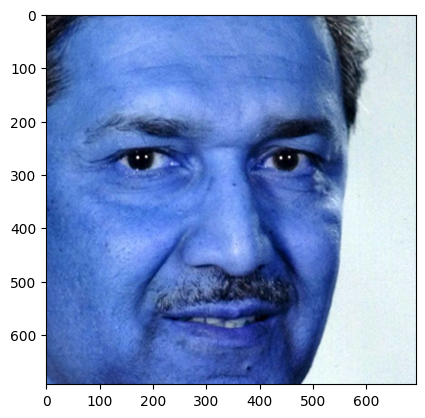

In [ ]:
cropped_image=get_cropped_image_if_2_eyes('./testImages/000001.jpg')
cropped_img
plt.imshow(cropped_image)

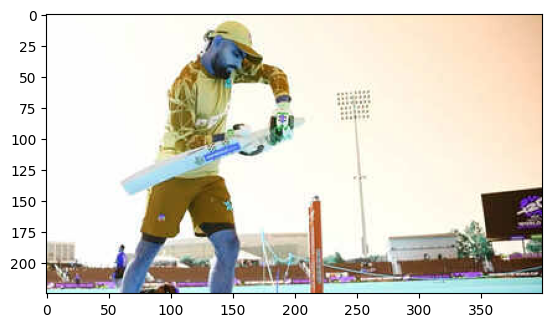

In [27]:
# In below image face is not very clear and it doesn't have two eyes clearly visible
org_image_obstructed = cv2.imread('./testImages/000010.jpg')
plt.imshow(org_image_obstructed)

In [29]:
desturtiveImage=get_cropped_image_if_2_eyes('./testImages/000010.jpg')

desturtiveImage

In [30]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [31]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [32]:
img_dirs

['./dataset/Abdul_Qadeer',
 './dataset/Babar_Azam',
 './dataset/Imran_Khan',
 './dataset/Quaid_Azam']

In [33]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [34]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/Abdul_Qadeer
Generating cropped images in folder:  ./dataset/cropped/Babar_Azam
Generating cropped images in folder:  ./dataset/cropped/Imran_Khan
Generating cropped images in folder:  ./dataset/cropped/Quaid_Azam


In [35]:
celebrity_file_names_dict

{'Abdul_Qadeer': ['./dataset/cropped/Abdul_Qadeer/Abdul_Qadeer1.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer2.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer3.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer4.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer5.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer6.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer7.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer8.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer9.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer10.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer11.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer12.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer13.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer14.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer15.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer16.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer17.png',
  './dataset/cropped/Abdul_Qadeer/Abdul_Qadeer18.png',
  '

In [36]:
elebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Abdul_Qadeer': ['./dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer1.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer10.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer11.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer12.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer13.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer15.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer16.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer17.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer2.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer20.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer21.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer3.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer4.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer5.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer6.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer7.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul_Qadeer8.png',
  './dataset/cropped/Abdul_Qadeer\\Abdul

In [37]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Abdul_Qadeer': 0, 'Babar_Azam': 1, 'Imran_Khan': 2, 'Quaid_Azam': 3}

In [38]:
# Images in cropped folder can be used for model training. \
# We will use these raw images along with wavelet transformed images to train our classifier.
#  Let's prepare X and y now

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [39]:
len(X[0])

4096

In [40]:
X[0]

array([[ 21],
       [ 18],
       [ 27],
       ...,
       [  2],
       [251],
       [ 58]], shape=(4096, 1), dtype=uint8)

In [41]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(68, 4096)

In [42]:
# Data cleaning process is done. Now we are ready to train our model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8823529411764706

In [44]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [45]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [46]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: U

,model,best_score,best_params
0,svm,0.860000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.701818,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.860000,{'logisticregression__C': 1}


In [47]:
best_estimators['svm'].score(X_test,y_test)

1.0

In [48]:
best_estimators['random_forest'].score(X_test,y_test)

0.5294117647058824

In [49]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9411764705882353

In [50]:
best_clf = best_estimators['svm']

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  5,  0],
       [ 0,  0,  0, 10]])

In [52]:

import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [53]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))